# Exploratory Analysis Zillow
Welcome and good luck to you all at Zillow’s Home Value prediction!
with a price pool of 1.2 Million Dollar

Here is a first exploratory analysis of the competition dataset. We are provided with a list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.

Zillow provides a “Zestimate”, which is an estimated property value.

Our task in this competition is to predict the the difference between the actual price and the estimate of the price (Zestimate). So, in fact we are predicting, where Zillow’s Zestimate will be good, and where it will be bad.

So, far so good. However, we don’t have to predict a single value, but instead for 6 different time points (from October 2016 to December 2017) (see sample submission)

The dataset consists of information about 2.9 million properties and is grouped into 2 files:

properties_2016.csv (containing information about the properties themselves)
train_2016.csv (containing information about the transcations)
Let’s look at the dataset:

Read in the data

In [1]:
#install.packages('DT')
#install.packages('corrplot')
#install.packages('leaflet')
#devtools::install_github("rstudio/leaflet")
#install.packages('lubridate')

library(data.table)
library(dplyr)
library(ggplot2)
library(stringr)
library(DT)
library(tidyr)
library(corrplot)
#library(leaflet)
library(lubridate)


Attaching package: ‘data.table’

The following objects are masked from ‘package:SparkR’:

    between, first, hour, last, like, minute, month, quarter, second,
    tables, year


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:SparkR’:

    arrange, between, collect, count, cume_dist, dense_rank, desc,
    distinct, explain, filter, first, group_by, intersect, lag, last,
    lead, mutate, n, n_distinct, ntile, percent_rank, rename,
    row_number, sample_frac, select, sql, summarize, union

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following objects are masked from ‘pa

In [2]:
# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
getObjectStorageFileWithCredentials_5011725d87b34b7194c1e1b3524df58d <- function(container, filename) {
    # This functions returns a textConnection object for a file
    # from Bluemix Object Storage.

    if(!require(httr)) install.packages('httr')
    if(!require(RCurl)) install.packages('RCurl')
    library(httr, RCurl)
    auth_url <- paste("https://identity.open.softlayer.com",'/v3/auth/tokens', sep= '')
    auth_args <- paste('{"auth": {"identity": {"password": {"user": {"domain": {"id": ', "116d405deaa444c5ab14a305a0aee84d",'},"password": ',
                    "ej!8W8xa-(DD}tv-",',"name": ', "member_222cd6c387a6f68656be861e713199eb319fa711",'}},"methods": ["password"]}}}', sep='"')
    auth_response <- httr::POST(url = auth_url, body = auth_args)
    x_subject_token <-  headers(auth_response)[['x-subject-token']]
    auth_body <-  content(auth_response)
    access_url <-  unlist(lapply(auth_body[['token']][['catalog']], function(catalog){
        if((catalog[['type']] == 'object-store')){
            lapply(catalog[['endpoints']], function(endpoints){
                if(endpoints[['interface']] == 'public' && endpoints[['region_id']] == 'dallas') {
                    paste(endpoints[['url']], container, filename, sep='/')}
            })
        }
    }))
    data <- content(httr::GET(url = access_url, add_headers ("Content-Type" = "application/json", "X-Auth-Token" = x_subject_token)), as="text")
    textConnection(data)
}

properties <-  read.csv(file = getObjectStorageFileWithCredentials_5011725d87b34b7194c1e1b3524df58d("TEST2", "zillow_properties_2016.csv"))
head(properties)
        
transactions <-  read.csv(file = getObjectStorageFileWithCredentials_5011725d87b34b7194c1e1b3524df58d("TEST2", "zillow_train_2016.csv"))
head(transactions)
        
sample_submission <-  read.csv(file = getObjectStorageFileWithCredentials_5011725d87b34b7194c1e1b3524df58d("TEST2", "zillow_sample_submission.csv"))
head(sample_submission)



Loading required package: httr
Loading required package: RCurl
Loading required package: bitops

Attaching package: ‘RCurl’

The following object is masked from ‘package:tidyr’:

    complete

The following object is masked from ‘package:SparkR’:

    base64



parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10754147,NA,NA,NA,0,0,NA,NA,NA,NA,...,NA,,NA,9,2015,9,NA,,NA,NA
10759547,NA,NA,NA,0,0,NA,NA,NA,NA,...,NA,,NA,27516,2015,27516,NA,,NA,NA
10843547,NA,NA,NA,0,0,NA,NA,NA,NA,...,NA,,650756,1413387,2015,762631,20800.37,,NA,NA
10859147,NA,NA,NA,0,0,3,7,NA,NA,...,1,,571346,1156834,2015,585488,14557.57,,NA,NA
10879947,NA,NA,NA,0,0,4,NA,NA,NA,...,NA,,193796,433491,2015,239695,5725.17,,NA,NA
10898347,NA,NA,NA,0,0,4,7,NA,NA,...,1,,176383,283315,2015,106932,3661.28,,NA,NA


parcelid,logerror,transactiondate
11016594,0.0276,2016-01-01
14366692,-0.1684,2016-01-01
12098116,-0.0040,2016-01-01
12643413,0.0218,2016-01-02
14432541,-0.0050,2016-01-02
11509835,-0.2705,2016-01-02


ParcelId,X201610,X201611,X201612,X201710,X201711,X201712
10754147,0,0,0,0,0,0
10759547,0,0,0,0,0,0
10843547,0,0,0,0,0,0
10859147,0,0,0,0,0,0
10879947,0,0,0,0,0,0
10898347,0,0,0,0,0,0


In [3]:
properties <- properties %>% rename(
  id_parcel = parcelid,
  build_year = yearbuilt,
  area_basement = basementsqft,
  area_patio = yardbuildingsqft17,
  area_shed = yardbuildingsqft26, 
  area_pool = poolsizesum,  
  area_lot = lotsizesquarefeet, 
  area_garage = garagetotalsqft,
  area_firstfloor_finished = finishedfloor1squarefeet,
  area_total_calc = calculatedfinishedsquarefeet,
  area_base = finishedsquarefeet6,
  area_live_finished = finishedsquarefeet12,
  area_liveperi_finished = finishedsquarefeet13,
  area_total_finished = finishedsquarefeet15,  
  area_unknown = finishedsquarefeet50,
  num_unit = unitcnt, 
  num_story = numberofstories,  
  num_room = roomcnt,
  num_bathroom = bathroomcnt,
  num_bedroom = bedroomcnt,
  num_bathroom_calc = calculatedbathnbr,
  num_bath = fullbathcnt,  
  num_75_bath = threequarterbathnbr, 
  num_fireplace = fireplacecnt,
  num_pool = poolcnt,  
  num_garage = garagecarcnt,  
  region_county = regionidcounty,
  region_city = regionidcity,
  region_zip = regionidzip,
  region_neighbor = regionidneighborhood,  
  tax_total = taxvaluedollarcnt,
  tax_building = structuretaxvaluedollarcnt,
  tax_land = landtaxvaluedollarcnt,
  tax_property = taxamount,
  tax_year = assessmentyear,
  tax_delinquency = taxdelinquencyflag,
  tax_delinquency_year = taxdelinquencyyear,
  zoning_property = propertyzoningdesc,
  zoning_landuse = propertylandusetypeid,
  zoning_landuse_county = propertycountylandusecode,
  flag_fireplace = fireplaceflag, 
  flag_tub = hashottuborspa,
  quality = buildingqualitytypeid,
  framing = buildingclasstypeid,
  material = typeconstructiontypeid,
  deck = decktypeid,
  story = storytypeid,
  heating = heatingorsystemtypeid,
  aircon = airconditioningtypeid,
  architectural_style= architecturalstyletypeid
)
transactions <- transactions %>% rename(
  id_parcel = parcelid,
  date = transactiondate
)

properties <- properties %>% 
  mutate(tax_delinquency = ifelse(tax_delinquency=="Y",1,0),
         flag_fireplace = ifelse(flag_fireplace=="Y",1,0),
         flag_tub = ifelse(flag_tub=="Y",1,0))

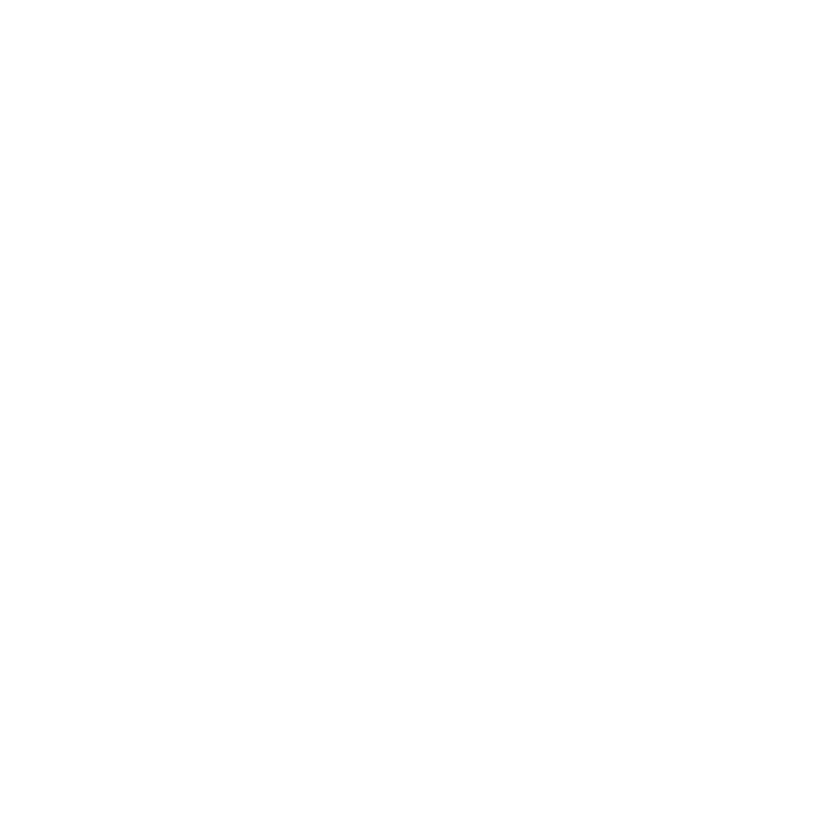

In [4]:
tmp <- transactions %>% mutate(year_month = make_date(year=year(date),month=month(date)))
tmp %>% 
  group_by(year_month) %>% count() %>% 
  ggplot(aes(x=year_month,y=n)) +
  geom_bar(stat="identity", fill="red")+
  geom_vline(aes(xintercept=as.numeric(as.Date("2016-10-01"))),size=2)

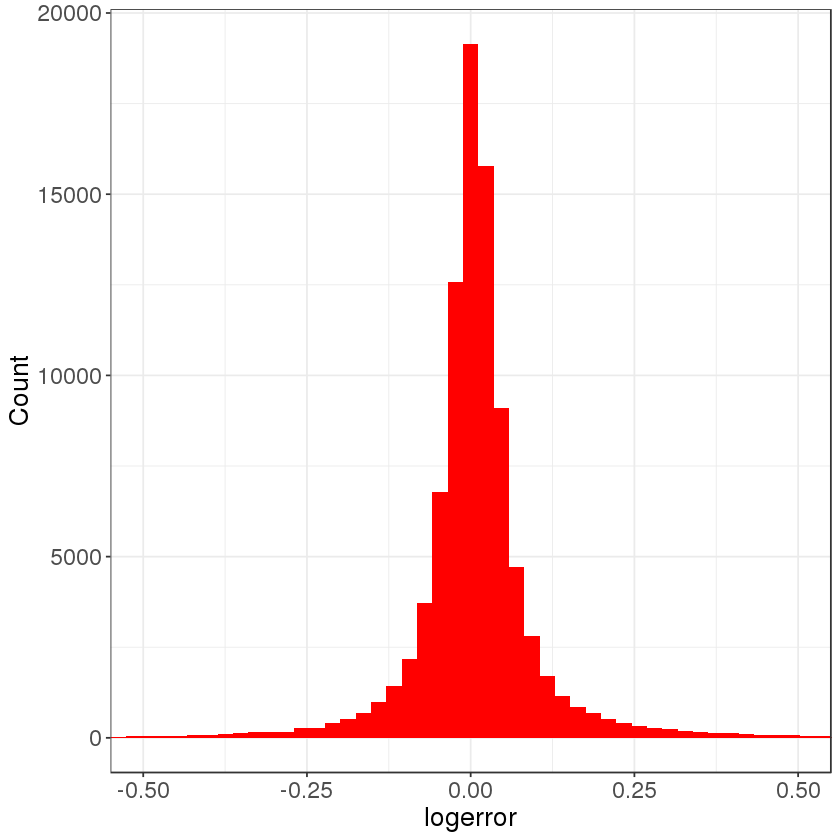

In [5]:
transactions %>% 
  ggplot(aes(x=logerror)) + 
  geom_histogram(bins=400, fill="red")+
  theme_bw()+theme(axis.title = element_text(size=16),axis.text = element_text(size=14))+
  ylab("Count")+coord_cartesian(x=c(-0.5,0.5))

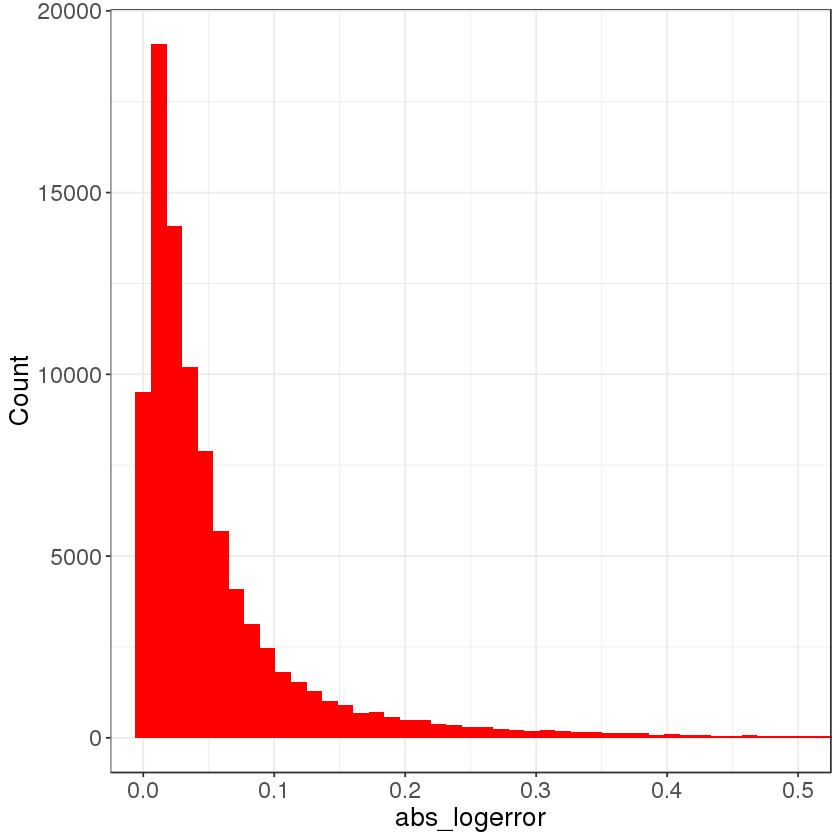

In [6]:
transactions <- transactions %>% mutate(abs_logerror = abs(logerror))
transactions %>% 
  ggplot(aes(x=abs_logerror)) + 
  geom_histogram(bins=400, fill="red")+
  theme_bw()+theme(axis.title = element_text(size=16),axis.text = element_text(size=14))+
  ylab("Count")+coord_cartesian(x=c(0,0.5))

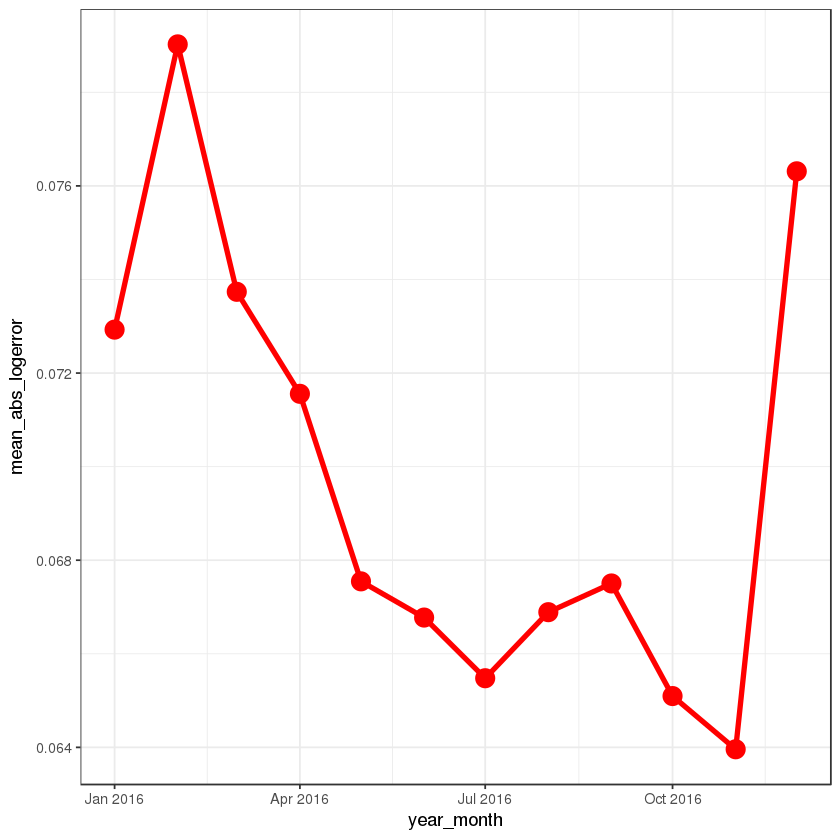

In [7]:
transactions %>% 
  mutate(year_month = make_date(year=year(date),month=month(date)) ) %>% 
  group_by(year_month) %>% summarize(mean_abs_logerror = mean(abs_logerror)) %>% 
  ggplot(aes(x=year_month,y=mean_abs_logerror)) + 
  geom_line(size=1.5, color="red")+
  geom_point(size=5, color="red")+theme_bw()

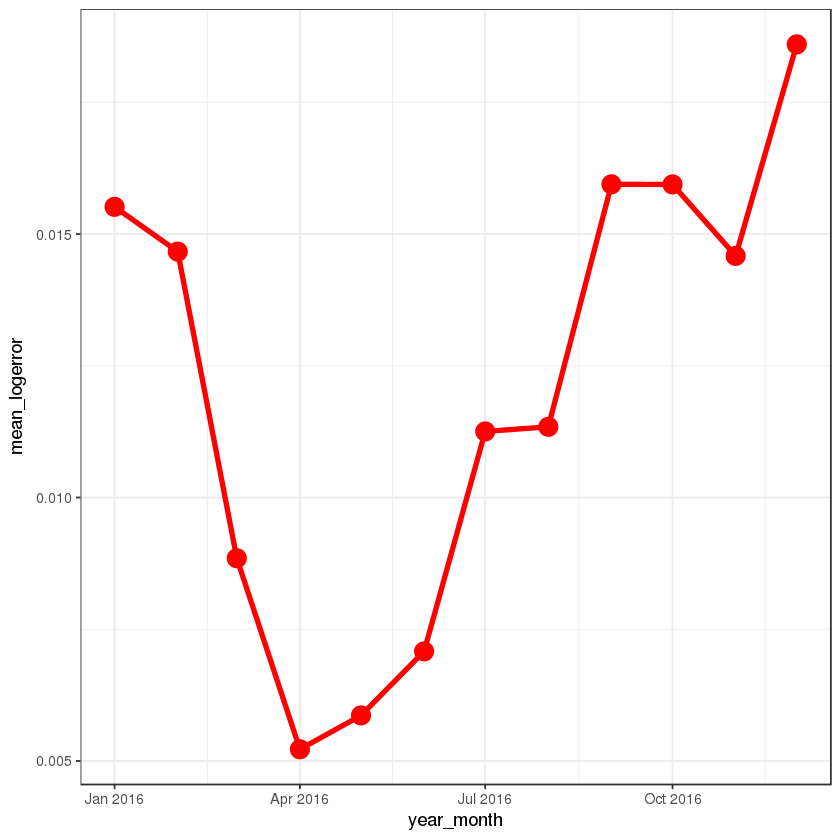

In [8]:
transactions %>% 
  mutate(year_month = make_date(year=year(date),month=month(date)) ) %>% 
  group_by(year_month) %>% summarize(mean_logerror = mean(logerror)) %>% 
  ggplot(aes(x=year_month,y=mean_logerror)) + 
  geom_line(size=1.5, color="red")+geom_point(size=5, color="red")+theme_bw()

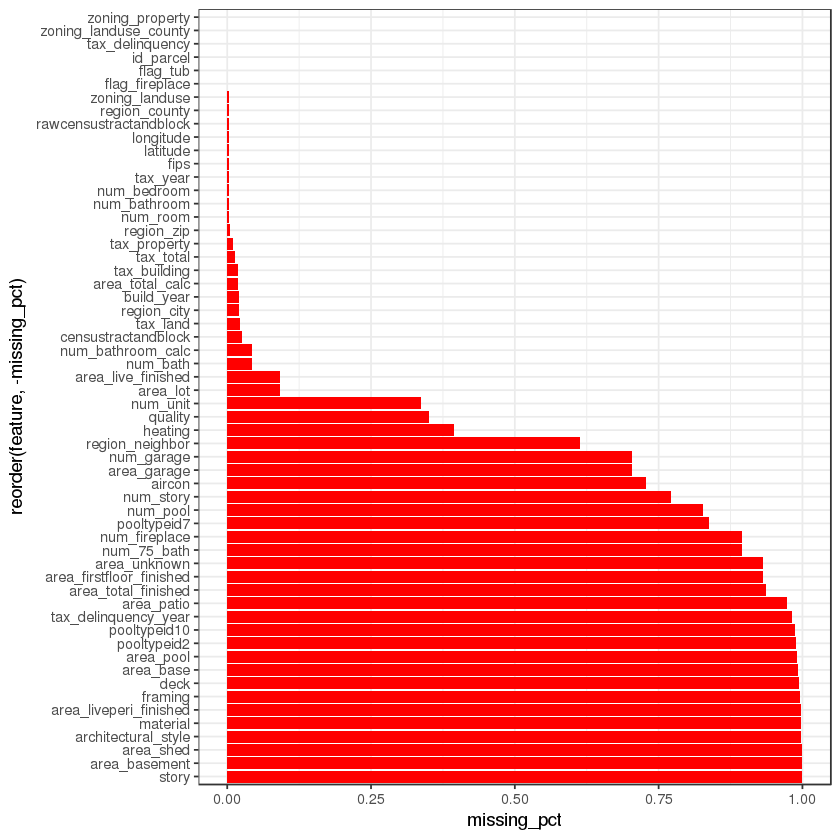

In [9]:
missing_values <- properties %>% summarize_each(funs(sum(is.na(.))/n()))

missing_values <- gather(missing_values, key="feature", value="missing_pct")
missing_values %>% 
  ggplot(aes(x=reorder(feature,-missing_pct),y=missing_pct)) +
  geom_bar(stat="identity",fill="red")+
  coord_flip()+theme_bw()

In [10]:
good_features <- filter(missing_values, missing_pct<0.75)

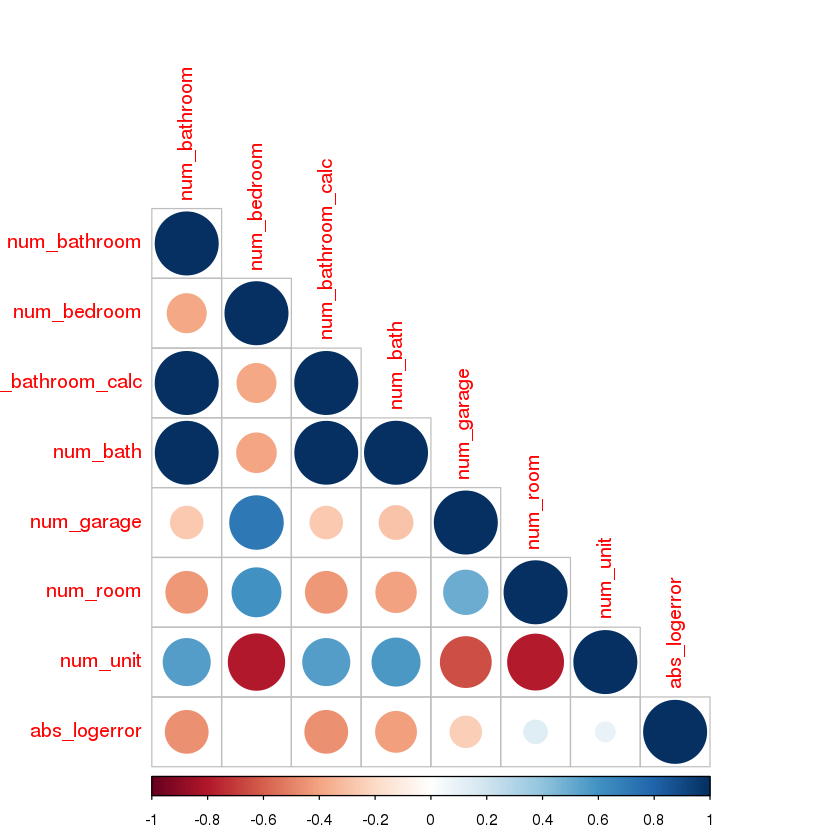

In [11]:
vars <- good_features$feature[str_detect(good_features$feature,'num_')]

cor_tmp <- transactions %>% left_join(properties, by="id_parcel") 
tmp <- cor_tmp %>% select(one_of(c(vars,"abs_logerror")))

corrplot(cor(tmp, use="complete.obs"),type="lower")

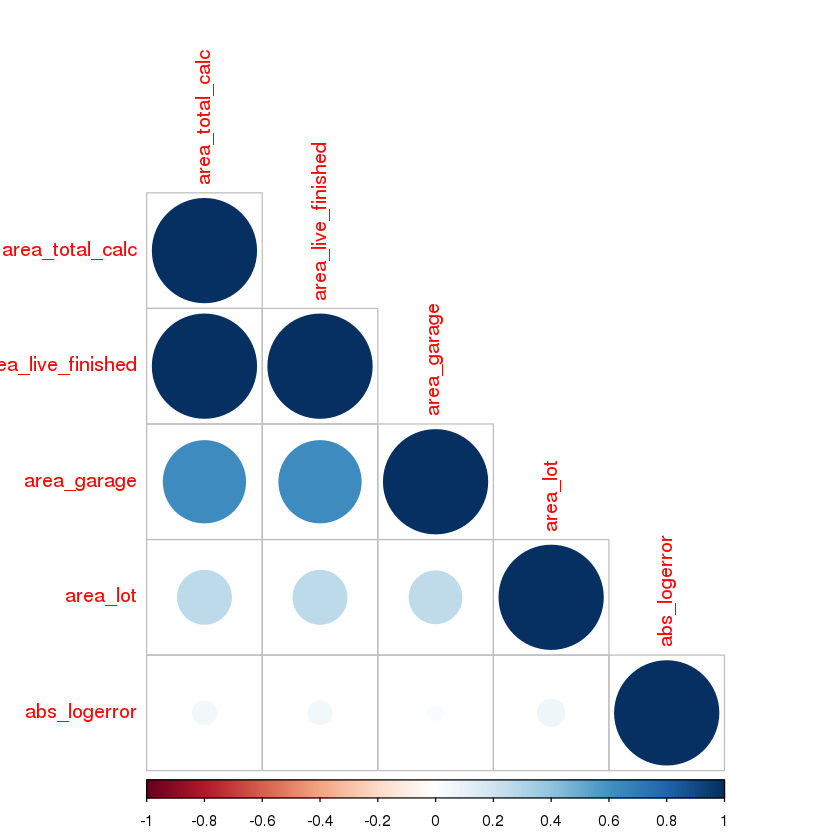

In [12]:
vars <- good_features$feature[str_detect(good_features$feature,'area_')]

tmp <- cor_tmp %>% select(one_of(c(vars,"abs_logerror")))

corrplot(cor(tmp, use="complete.obs"), type="lower")

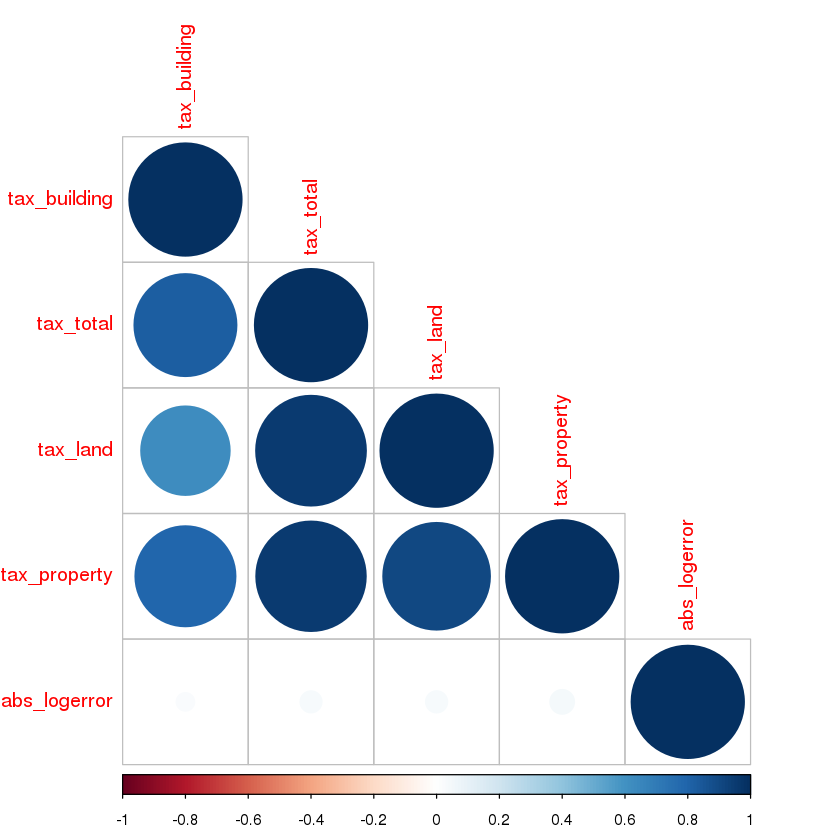

In [13]:
vars <- setdiff(good_features$feature[str_detect(good_features$feature,'tax_')],c("tax_delinquency","tax_year"))

tmp <- cor_tmp %>% select(one_of(c(vars,"abs_logerror")))

corrplot(cor(tmp, use="complete.obs"), type="lower")

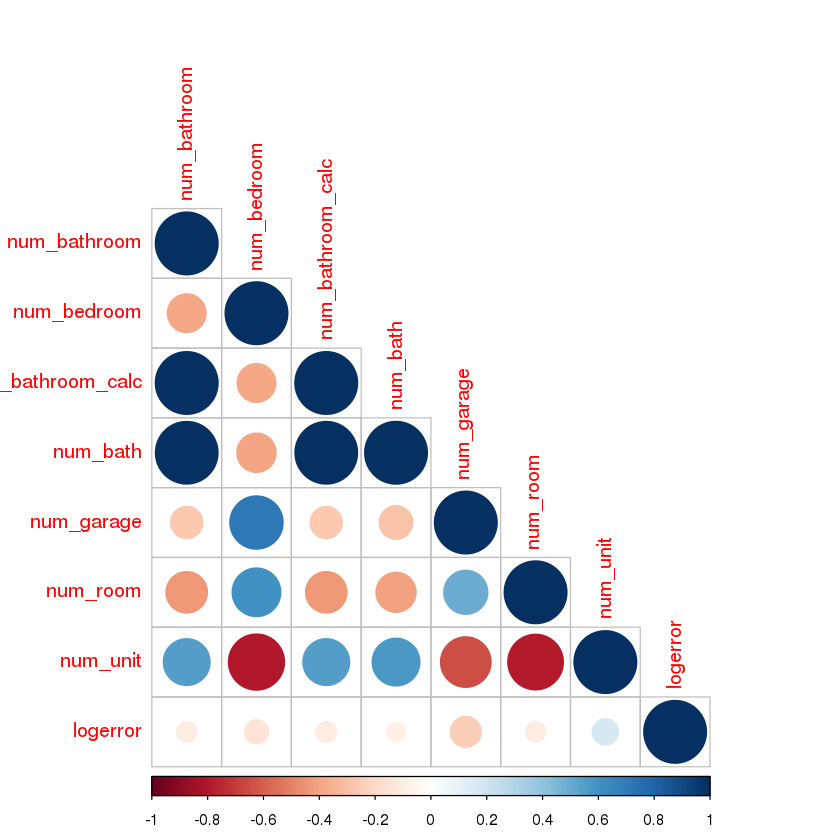

In [14]:
vars <- good_features$feature[str_detect(good_features$feature,'num_')]

cor_tmp <- transactions %>% left_join(properties, by="id_parcel") 
tmp <- cor_tmp %>% select(one_of(c(vars,"logerror")))

corrplot(cor(tmp, use="complete.obs"),type="lower")

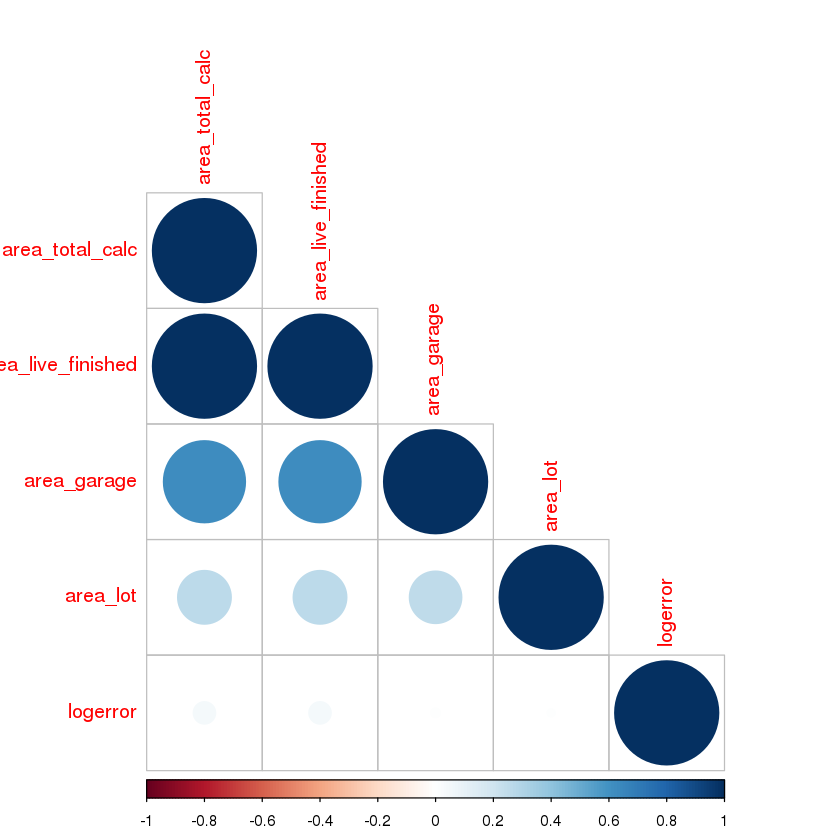

In [15]:
vars <- good_features$feature[str_detect(good_features$feature,'area_')]

tmp <- cor_tmp %>%  select(one_of(c(vars,"logerror")))

corrplot(cor(tmp, use="complete.obs"), type="lower")

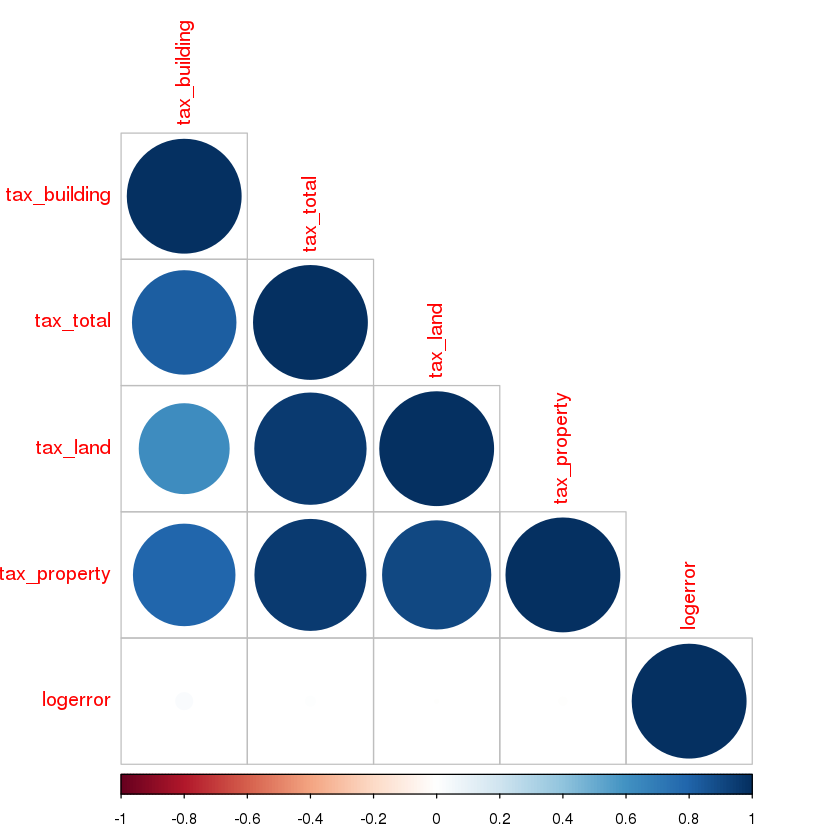

In [16]:
vars <- setdiff(good_features$feature[str_detect(good_features$feature,'tax_')],c("tax_delinquency","tax_year"))

tmp <- cor_tmp %>%  select(one_of(c(vars,"logerror")))

corrplot(cor(tmp, use="complete.obs"), type="lower")


Warning message:
“Removed 1292 rows containing non-finite values (stat_density).”

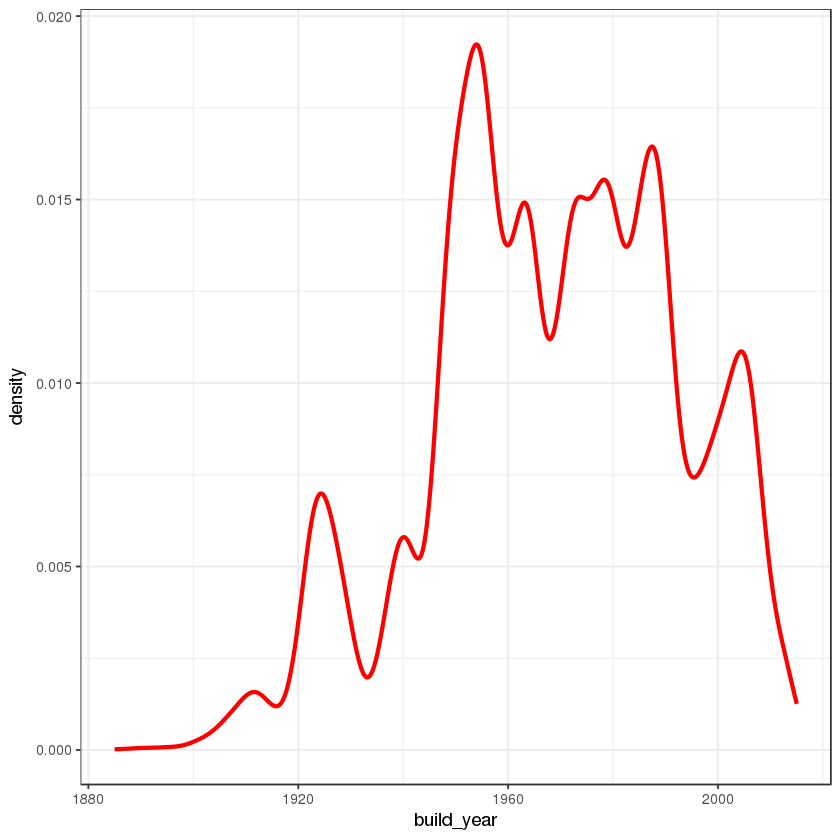

In [17]:
cor_tmp %>% 
  ggplot(aes(x=build_year))+geom_line(stat="density", color="red", size=1.2)+theme_bw()

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

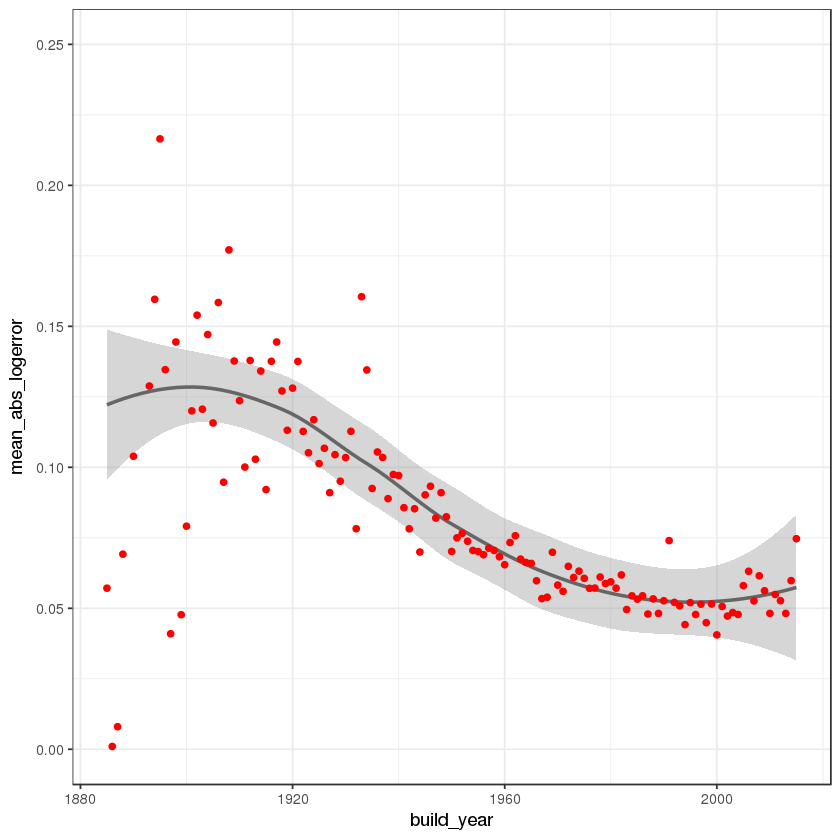

In [18]:
cor_tmp %>% 
  group_by(build_year) %>% 
  summarize(mean_abs_logerror = mean(abs(logerror)),n()) %>% 
  ggplot(aes(x=build_year,y=mean_abs_logerror))+
  geom_smooth(color="grey40")+
  geom_point(color="red")+coord_cartesian(ylim=c(0,0.25))+theme_bw()

`geom_smooth()` using method = 'loess'
Warning message:
“Removed 1 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 1 rows containing missing values (geom_point).”

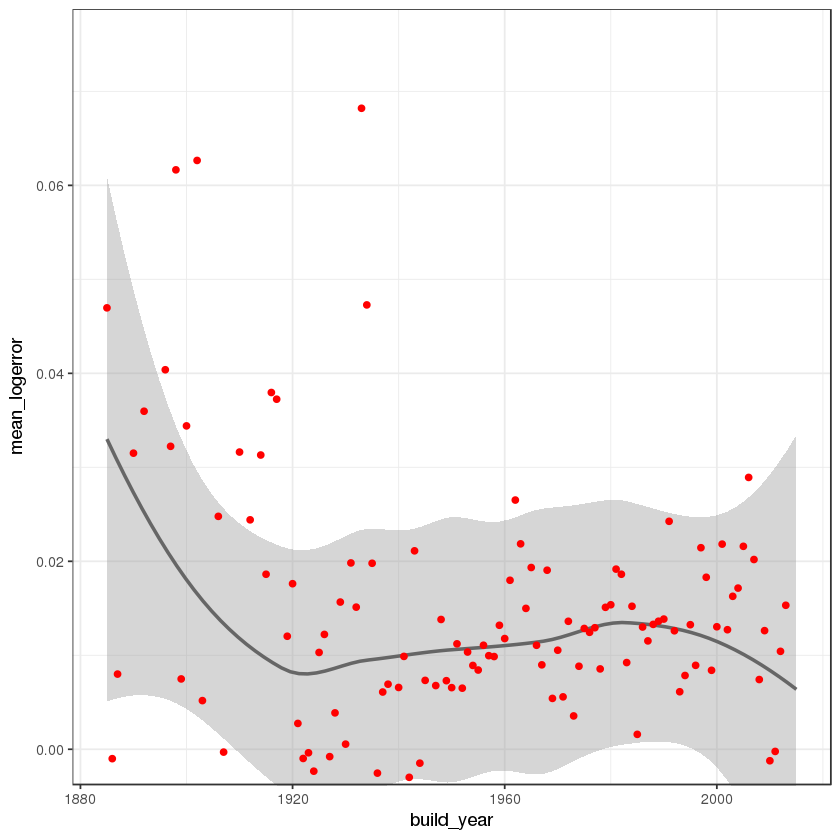

In [19]:
cor_tmp %>% 
  group_by(build_year) %>% 
  summarize(mean_logerror = mean(logerror)) %>% 
  ggplot(aes(x=build_year,y=mean_logerror))+
  geom_smooth(color="grey40")+
  geom_point(color="red")+coord_cartesian(ylim=c(0,0.075))+theme_bw()

In [20]:
transactions <- transactions %>% mutate(percentile = cut(abs_logerror,quantile(abs_logerror, probs=c(0, 0.1, 0.25, 0.75, 0.9, 1),names = FALSE),include.lowest = TRUE,labels=FALSE))

tmp1 <- transactions %>% 
  filter(percentile == 1) %>% 
  sample_n(5000) %>% 
  left_join(properties, by="id_parcel")
tmp2 <- transactions %>% 
  filter(percentile == 5) %>% 
  sample_n(5000) %>% 
  left_join(properties, by="id_parcel")
tmp3 <- transactions %>% 
  filter(percentile == 3) %>% 
  sample_n(5000) %>% 
  left_join(properties, by="id_parcel")

tmp1 <- tmp1 %>% mutate(type="best_fit")
tmp2 <- tmp2 %>% mutate(type="worst_fit")
tmp3 <- tmp3 %>% mutate(type="typical_fit")


tmp <- bind_rows(tmp1,tmp2,tmp3)
tmp <- tmp %>% mutate(type = factor(type,levels = c("worst_fit", "typical_fit", "best_fit")))

Warning message:
“Removed 135 rows containing non-finite values (stat_density).”

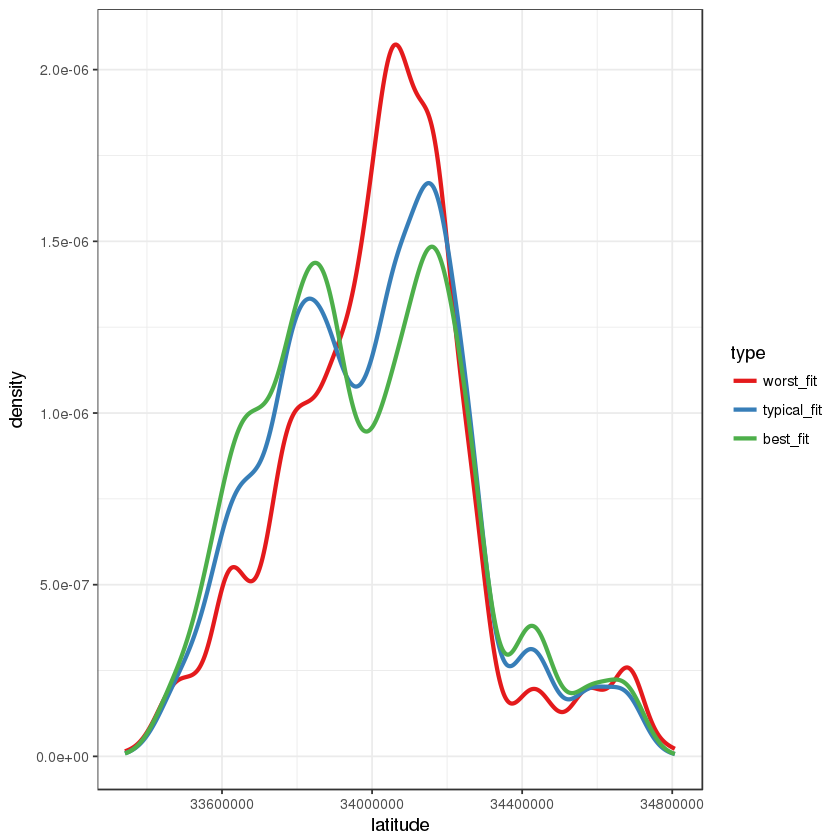

In [21]:
col_pal <- "Set1"

tmp %>% ggplot(aes(x=latitude, fill=type, color=type)) + geom_line(stat="density", size=1.2) + theme_bw()+scale_fill_brewer(palette=col_pal)+scale_color_brewer(palette=col_pal)

`geom_smooth()` using method = 'gam'
Warning message:
“Removed 536 rows containing non-finite values (stat_smooth).”

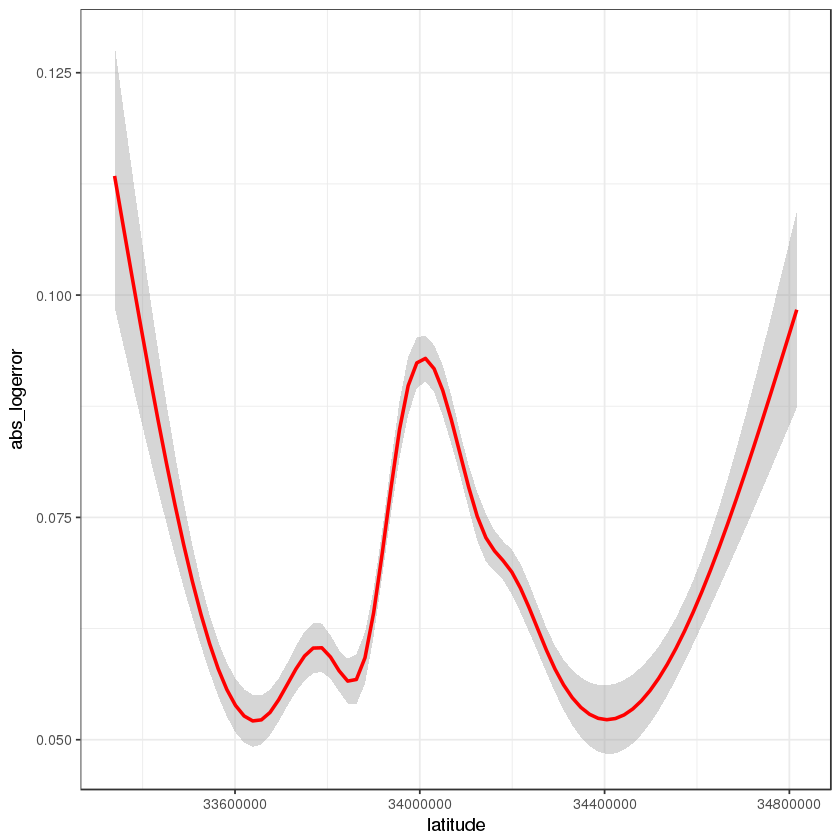

In [22]:
tmptrans <- transactions %>% 
  left_join(properties, by="id_parcel")

tmptrans %>% 
  ggplot(aes(x=latitude,y=abs_logerror))+geom_smooth(color="red")+theme_bw()